<a href="https://colab.research.google.com/github/eniangnsa/Boilerplate/blob/master/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow --upgrade tensorflow --quiet

In [ ]:
#. Install all the necessary libraries and import them into the project.
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from keras.optimizers import Adam
from keras.utils import custom_object_scope
from keras import models
from keras import layers
from keras.layers import Dense


In [ ]:
# Read and view the data set
( X_train , y_train ), ( X_test , y_test ) = mnist.load_data ()
print( X_train.shape )
print( y_train.shape )
print( X_test.shape )
print( y_test.shape )

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
#output a portion of the training images and their corresponding labels.
image_number = random.randint (0, len ( X_train ) - 20)
plt.figure ( figsize =(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

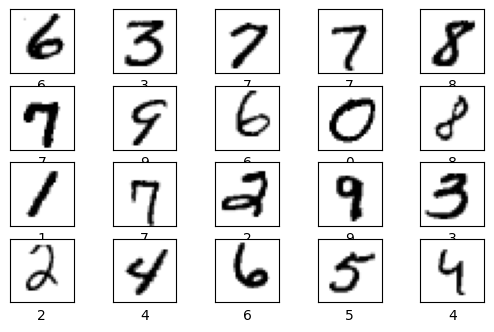

In [ ]:
for i in range( image_number , image_number + 20):
 plt.subplot (5,5,i-image_number + 1)
 plt.xticks ([])
 plt.yticks ([])
 plt.grid (False)
 plt.imshow ( X_train [ i ], cmap = plt.cm.binary )
 plt.xlabel ( y_train [ i ])

In [ ]:
# data preparation
batch_size , img_rows , img_cols = 64, 28, 28 # Size Images
X_train = X_train.reshape ( X_train.shape [0], img_rows ,img_cols , 1)
X_test = X_test.reshape ( X_test.shape [0], img_rows , img_cols, 1)
input_shape = ( img_rows , img_cols , 1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# data normalization
X_train = X_train.astype ("float32")
X_test = X_test.astype ("float32")
X_train /= 255
X_test /= 255

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#Convert tags to categories
Y_train = to_categorical ( y_train , 10)
Y_test = to_categorical ( y_test , 10)

In [ ]:
Y_train.shape

(60000, 10)

In [ ]:
cnn = Sequential([

    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 54s 27ms/step - loss: 0.1591 - accuracy: 0.9536
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0557 - accuracy: 0.9832
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0360 - accuracy: 0.9886
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0177 - accuracy: 0.9939


In [ ]:
y_preds = cnn.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [ ]:
cnn.summary ()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 30)        300       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 30)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5070)              0         
                                                                 
 dense (Dense)               (None, 100)               507100    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                        

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)